In [ ]:
Data cleaning and Data Exploration

In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Data Cleaning

In [3]:
data = pd.read_csv('C:/Users/jadea/Notebooks/Mémoire M2 notebooks/skytrax_all.csv')

#Remove duplicates
data = data.drop_duplicates()
data = data.drop_duplicates(subset='Review')

#clean overall ratings 
data['Overall_Rating'] = data['Overall_Rating'].apply(lambda x: x.replace('n','10'))
data['Overall_Rating'] = data['Overall_Rating'].astype(int)
data['Overall_Rating'].unique()

# Function to remove ordinal suffixes more robustly
def remove_ordinal_suffix(date_str):
    # Pattern to find ordinal numbers and replace them with the number only
    date_str = re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)
    return date_str

# Apply the function to the date column
data['Review Date'] = data['Review Date'].apply(remove_ordinal_suffix)

# Convert to datetime
# Convert to datetime with the correct format
data['Review Date'] = pd.to_datetime(data['Review Date'], format='%d %B %Y')


#clean review text 
def clean_reviews(df):
    
    df_copy = df.copy()

    def clean_row(text_row):
        # Use a regular expression to remove non-alphanumeric characters
        cleaned_text = re.sub(r'[^\w\s\']', ' ', text_row)
        # Replace consecutive spaces with a single space
        cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
        cleaned_text.replace('\\','')
        cleaned_text.replace('\n','')
        cleaned_text = cleaned_text.lower()
        return cleaned_text
    
    df_copy['Review'] = df_copy['Review'].apply(lambda x: clean_row(x))
    df_copy['Review_Title'] = df_copy['Review_Title'].apply(lambda x: clean_row(x))
    df_copy = df_copy.reset_index(drop=True)
    
    return df_copy

data_clean = clean_reviews(data)
data_clean

#show data
data

ERROR! Session/line number was not unique in database. History logging moved to new session 385


,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,...,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,origin,destination
0,Peach Aviation,1,"""caused me big trouble""",2024-01-13,True,Peach Aviation staff delayed issuing the boa...,NaN,Solo Leisure,Economy Class,Shanghai to Tokyo Haneda,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,no,Shanghai,TokyoHaneda
1,Peach Aviation,1,"""very strict about the 7kg carryon""",2023-12-22,False,Airline staff is very strict about the 7kg ca...,NaN,Family Leisure,Economy Class,Narita to Taipei,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,Narita,Taipei
2,Peach Aviation,1,"""Please don't take this airline""",2023-11-06,True,"Please don't take this airline, 1 hour befor...",NaN,Solo Leisure,Economy Class,Tokyo Haneda to Incheon,...,NaN,NaN,NaN,2.0,NaN,NaN,4.0,no,TokyoHaneda,Incheon
3,Peach Aviation,1,"""such a negative experience""",2023-10-15,True,I had an extremely frustrating experience w...,NaN,Solo Leisure,Economy Class,Narita to Kansai,...,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,Narita,Kansai
4,Peach Aviation,1,"""luggage exceeded the total size by 5cm""",2023-03-02,True,We flew from Tokyo to Sapporo and the baggag...,NaN,Family Leisure,Economy Class,Tokyo to Sapporo,...,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,Tokyo,Sapporo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110151,Air India,3,Air India customer review,2011-12-02,False,LHR-DEL-BKK economy. I flew Air India for its ...,NaN,NaN,Economy Class,NaN,...,3.0,1.0,1.0,NaN,1.0,NaN,2.0,no,NaN,NaN
110152,Air India,7,Air India customer review,2011-11-30,False,YYZ-DEL-CCU in business class. Clean plane wor...,NaN,NaN,Business Class,NaN,...,4.0,4.0,3.0,NaN,3.0,NaN,4.0,yes,NaN,NaN
110153,Air India,8,Air India customer review,2011-11-04,False,Delhi to Varanasi return. A321 superb flight. ...,NaN,NaN,Economy Class,NaN,...,4.0,4.0,5.0,NaN,0.0,NaN,5.0,yes,NaN,NaN
110154,Air India,5,Air India customer review,2011-11-03,False,ORD-FRA-BOM-MAA return. ORD-BOM sector on Boei...,NaN,NaN,Economy Class,NaN,...,3.0,4.0,4.0,NaN,2.0,NaN,5.0,no,NaN,NaN


In [4]:
#show reviews examples
list(data['Review'].head(10))

['  Peach Aviation staff delayed issuing the boarding pass, I rushed to the boarding gate but the staff shut off the boarding gate in front of me and declared boarding is finished.  Then the boarding staff made false promise to rebook ticket for me. When I asked the staff to rebook the ticket the staff denied the rebook ticket promise immediately and totally had no intention to provide any help and service. I stuck in the airport in the middle night. Peach Aviation caused me big trouble and huge financial loss. ',
 ' Airline staff is very strict about the 7kg carryon and kept rechecking our weights and dimensions during checkin, even as we were just 0.5-1kg over it. Very negative and frustrating experience even before boarding the plane. You can barely carry anything with the 7kg limit - our near empty carryon suitcases alone are around at least 3-4kg. Being so strict about the carryon weight limit along with poor communication skills and empathy for customers is a surefire way to make

In [5]:
data.columns

Index(['Airline Name', 'Overall_Rating', 'Review_Title', 'Review Date',
       'Verified', 'Review', 'Aircraft', 'Type Of Traveller', 'Seat Type',
       'Route', 'Date Flown', 'Seat Comfort', 'Cabin Staff Service',
       'Food & Beverages', 'Ground Service', 'Inflight Entertainment',
       'Wifi & Connectivity', 'Value For Money', 'Recommended', 'origin',
       'destination'],
      dtype='object')

## Data Exploration

In [53]:
#to count how many rows have full additional ratings
def additional_ratings_full(row):
    for aspect in ['Seat Comfort', 'Cabin Staff Service',
                   'Food & Beverages', 'Ground Service',
                   'Inflight Entertainment', 'Wifi & Connectivity',
                   'Value For Money']:
        try:
            # Check if the value is an integer
            if pd.isnull(row[aspect]) or not isinstance(row[aspect], float):
                return False
        except KeyError:
            # Handle missing columns
            print(f"Column '{aspect}' not found in DataFrame.")
            return False
    return True

# Apply the function to create the 'Full_Ratings' column
data['Full_Ratings'] = data.apply(additional_ratings_full, axis=1)

In [44]:
#missing values per column
data.isna().sum()

Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  77265
Type Of Traveller         27069
Seat Type                  1505
Route                     27546
Date Flown                27185
Seat Comfort               9094
Cabin Staff Service        9418
Food & Beverages          26616
Ground Service            29939
Inflight Entertainment    39719
Wifi & Connectivity       80871
Value For Money             443
Recommended                   0
origin                    27546
destination               28750
Full_Ratings                  0
dtype: int64

In [54]:
#number of fully rated reviews (all 7 aspects)
data['Full_Ratings'].value_counts()

Full_Ratings
False    83680
True     26256
Name: count, dtype: int64

In [49]:
data[['Seat Comfort', 'Cabin Staff Service',
                   'Food & Beverages', 'Ground Service',
                   'Inflight Entertainment', 'Wifi & Connectivity',
                   'Value For Money']].head(30)

,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
0,NaN,NaN,NaN,1.0,NaN,NaN,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,NaN,NaN,NaN,2.0,NaN,NaN,4.0
3,1.0,1.0,NaN,1.0,NaN,NaN,1.0
4,1.0,1.0,NaN,1.0,NaN,NaN,1.0
5,3.0,1.0,NaN,1.0,NaN,NaN,3.0
6,NaN,NaN,NaN,1.0,NaN,NaN,1.0
7,1.0,NaN,NaN,1.0,NaN,NaN,1.0
8,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9,3.0,3.0,4.0,3.0,NaN,NaN,4.0


count    109936.000000
mean        765.790123
std         538.976345
min          14.000000
25%         400.000000
50%         615.000000
75%         955.000000
max        5578.000000
Name: Review, dtype: float64

4277


<function matplotlib.pyplot.show(close=None, block=None)>

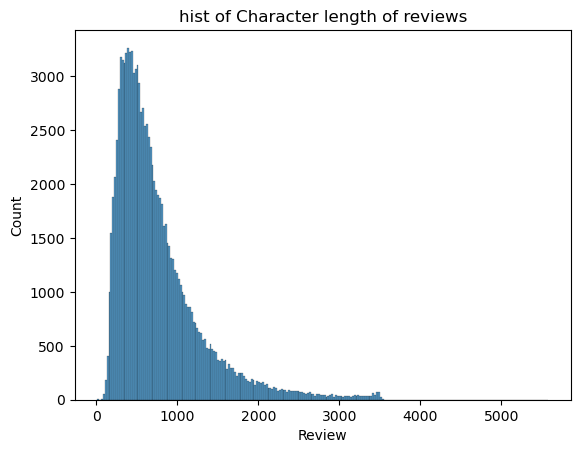

In [10]:
#histogram: distribution of length of reviews (in number of characters)
len_reviews = data['Review'].apply(lambda x: len(x))
print(len_reviews.describe())
print((len_reviews>2000).sum()) #4277 reviews are longer than 4277 characters which might cause an issue for Bert later
sns.histplot(len_reviews)
plt.title('hist of Character length of reviews')
plt.show

C:\Users\jadea\AppData\Local\Temp\ipykernel_11252\3568322904.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='Type Of Traveller', palette='Blues')


<Axes: xlabel='count', ylabel='Type Of Traveller'>

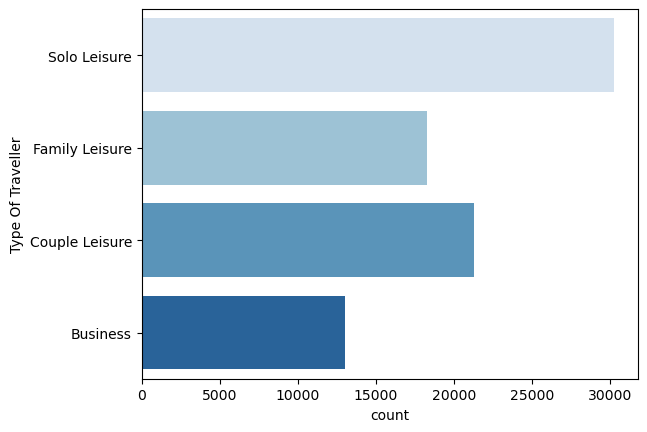

In [89]:
sns.countplot(data=data, y='Type Of Traveller', palette='Blues')

C:\Users\jadea\AppData\Local\Temp\ipykernel_11252\1537132633.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='Seat Type', palette = 'viridis')


<Axes: xlabel='count', ylabel='Seat Type'>

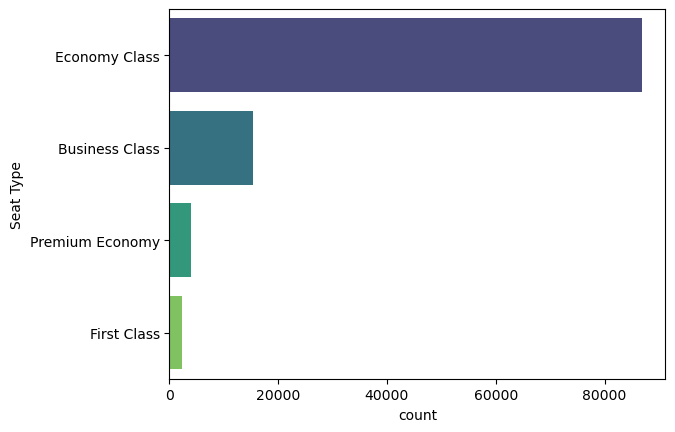

In [90]:
sns.countplot(data=data, y='Seat Type', palette = 'viridis')

In [23]:
data.sample(10)

,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,...,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,origin,destination
94811,American Airlines,1,"""The worst first class experience""",2022-07-19,False,The worst first class experience in my 53 ye...,Boeing 787-9,Couple Leisure,First Class,Dallas Ft Worth to Kahului,...,2.0,2.0,1.0,1.0,3.0,4.0,1.0,no,DallasFtWorth,Kahului
80293,British Airways,2,"""I am very disappointed""",2017-06-20,False,Singapore to London. I have started to take ...,NaN,Business,Business Class,Singapore to London,...,1.0,1.0,1.0,1.0,2.0,NaN,1.0,no,Singapore,London
105846,Air Canada,1,Air Canada customer review,2013-09-11,False,I fly regularly on the Boston to Toronto route...,NaN,NaN,Economy Class,NaN,...,3.0,1.0,2.0,NaN,1.0,NaN,3.0,no,NaN,NaN
88288,Air Transat,9,"""such a pleasurable trip""",2015-11-26,False,My short 50 minute flight from Toronto to Mont...,Boeing 737-800,Solo Leisure,Economy Class,YYZ to YUL,...,4.0,5.0,5.0,5.0,NaN,NaN,5.0,yes,YYZ,YUL
81913,British Airways,1,British Airways customer review,2014-12-31,False,Austin to London on a 787. Difficult to quite ...,NaN,NaN,Business Class,NaN,...,5.0,5.0,5.0,NaN,5.0,NaN,5.0,yes,NaN,NaN
97983,American Airlines,1,"""never be flying AA or BA in the future""",2018-02-28,True,Orlando to Gatwick via new York JFK. On arri...,NaN,Family Leisure,Economy Class,Orlando to Gatwick via new York JFK,...,3.0,3.0,NaN,1.0,NaN,NaN,2.0,no,Orlando,GatwickvianewYorkJFK
79247,British Airways,4,"""I would need to call up to rebook""",2021-04-01,True,Ok flight apart from they cancelled the majo...,NaN,Solo Leisure,Economy Class,Gatwick to Cancun,...,2.0,4.0,1.0,3.0,3.0,NaN,1.0,no,Gatwick,Cancun
61470,Garuda Indonesia,7,"""welcomed everyone warmly""",2015-12-05,False,Garuda Indonesia from Singapore to Bali. Load ...,Beoing 737-800NG,Solo Leisure,Economy Class,Singapore to Bali,...,1.0,5.0,3.0,5.0,3.0,NaN,5.0,yes,Singapore,Bali
15421,Turkish Airlines,1,"""old style business class seats""",2016-11-13,False,Amman to Bogota via Istanbul. While the Amma...,A330,Business,Business Class,AMM to BOG via IST,...,1.0,1.0,2.0,1.0,2.0,NaN,1.0,no,AMM,BOGviaIST
105005,Air Canada,2,"""don't fly with Air Canada""",2017-06-30,False,Tokyo to Denver via Vancouver. Tokyo to Vanc...,NaN,Couple Leisure,Economy Class,Tokyo to Denver via Vancouver,...,4.0,4.0,3.0,1.0,4.0,NaN,2.0,no,Tokyo,DenverviaVancouver


plot of number of reviews per airline, descending order

Airline Name
American Airlines           5969
Spirit Airlines             5121
United Airlines             4869
British Airways             3786
Frontier Airlines           3621
Delta Air Lines             3000
Turkish Airlines            2545
Lufthansa                   2448
Qatar Airways               2410
Emirates                    2364
Air Canada                  2360
Ryanair                     2261
China Southern Airlines     2019
Allegiant Air               1964
Qantas Airways              1898
Southwest Airlines          1822
Etihad Airways              1767
KLM Royal Dutch Airlines    1603
Jetblue Airways             1601
Singapore Airlines          1569
TAP Portugal                1523
easyJet                     1495
Wizz Air                    1449
Cathay Pacific Airways      1446
Malaysia Airlines           1433
Air France                  1353
Air India                   1332
Norwegian                   1326
Jetstar Airways             1301
Vueling Airlines            12

<Axes: title={'center': 'Most represented airlines in the data'}, ylabel='Airline Name'>

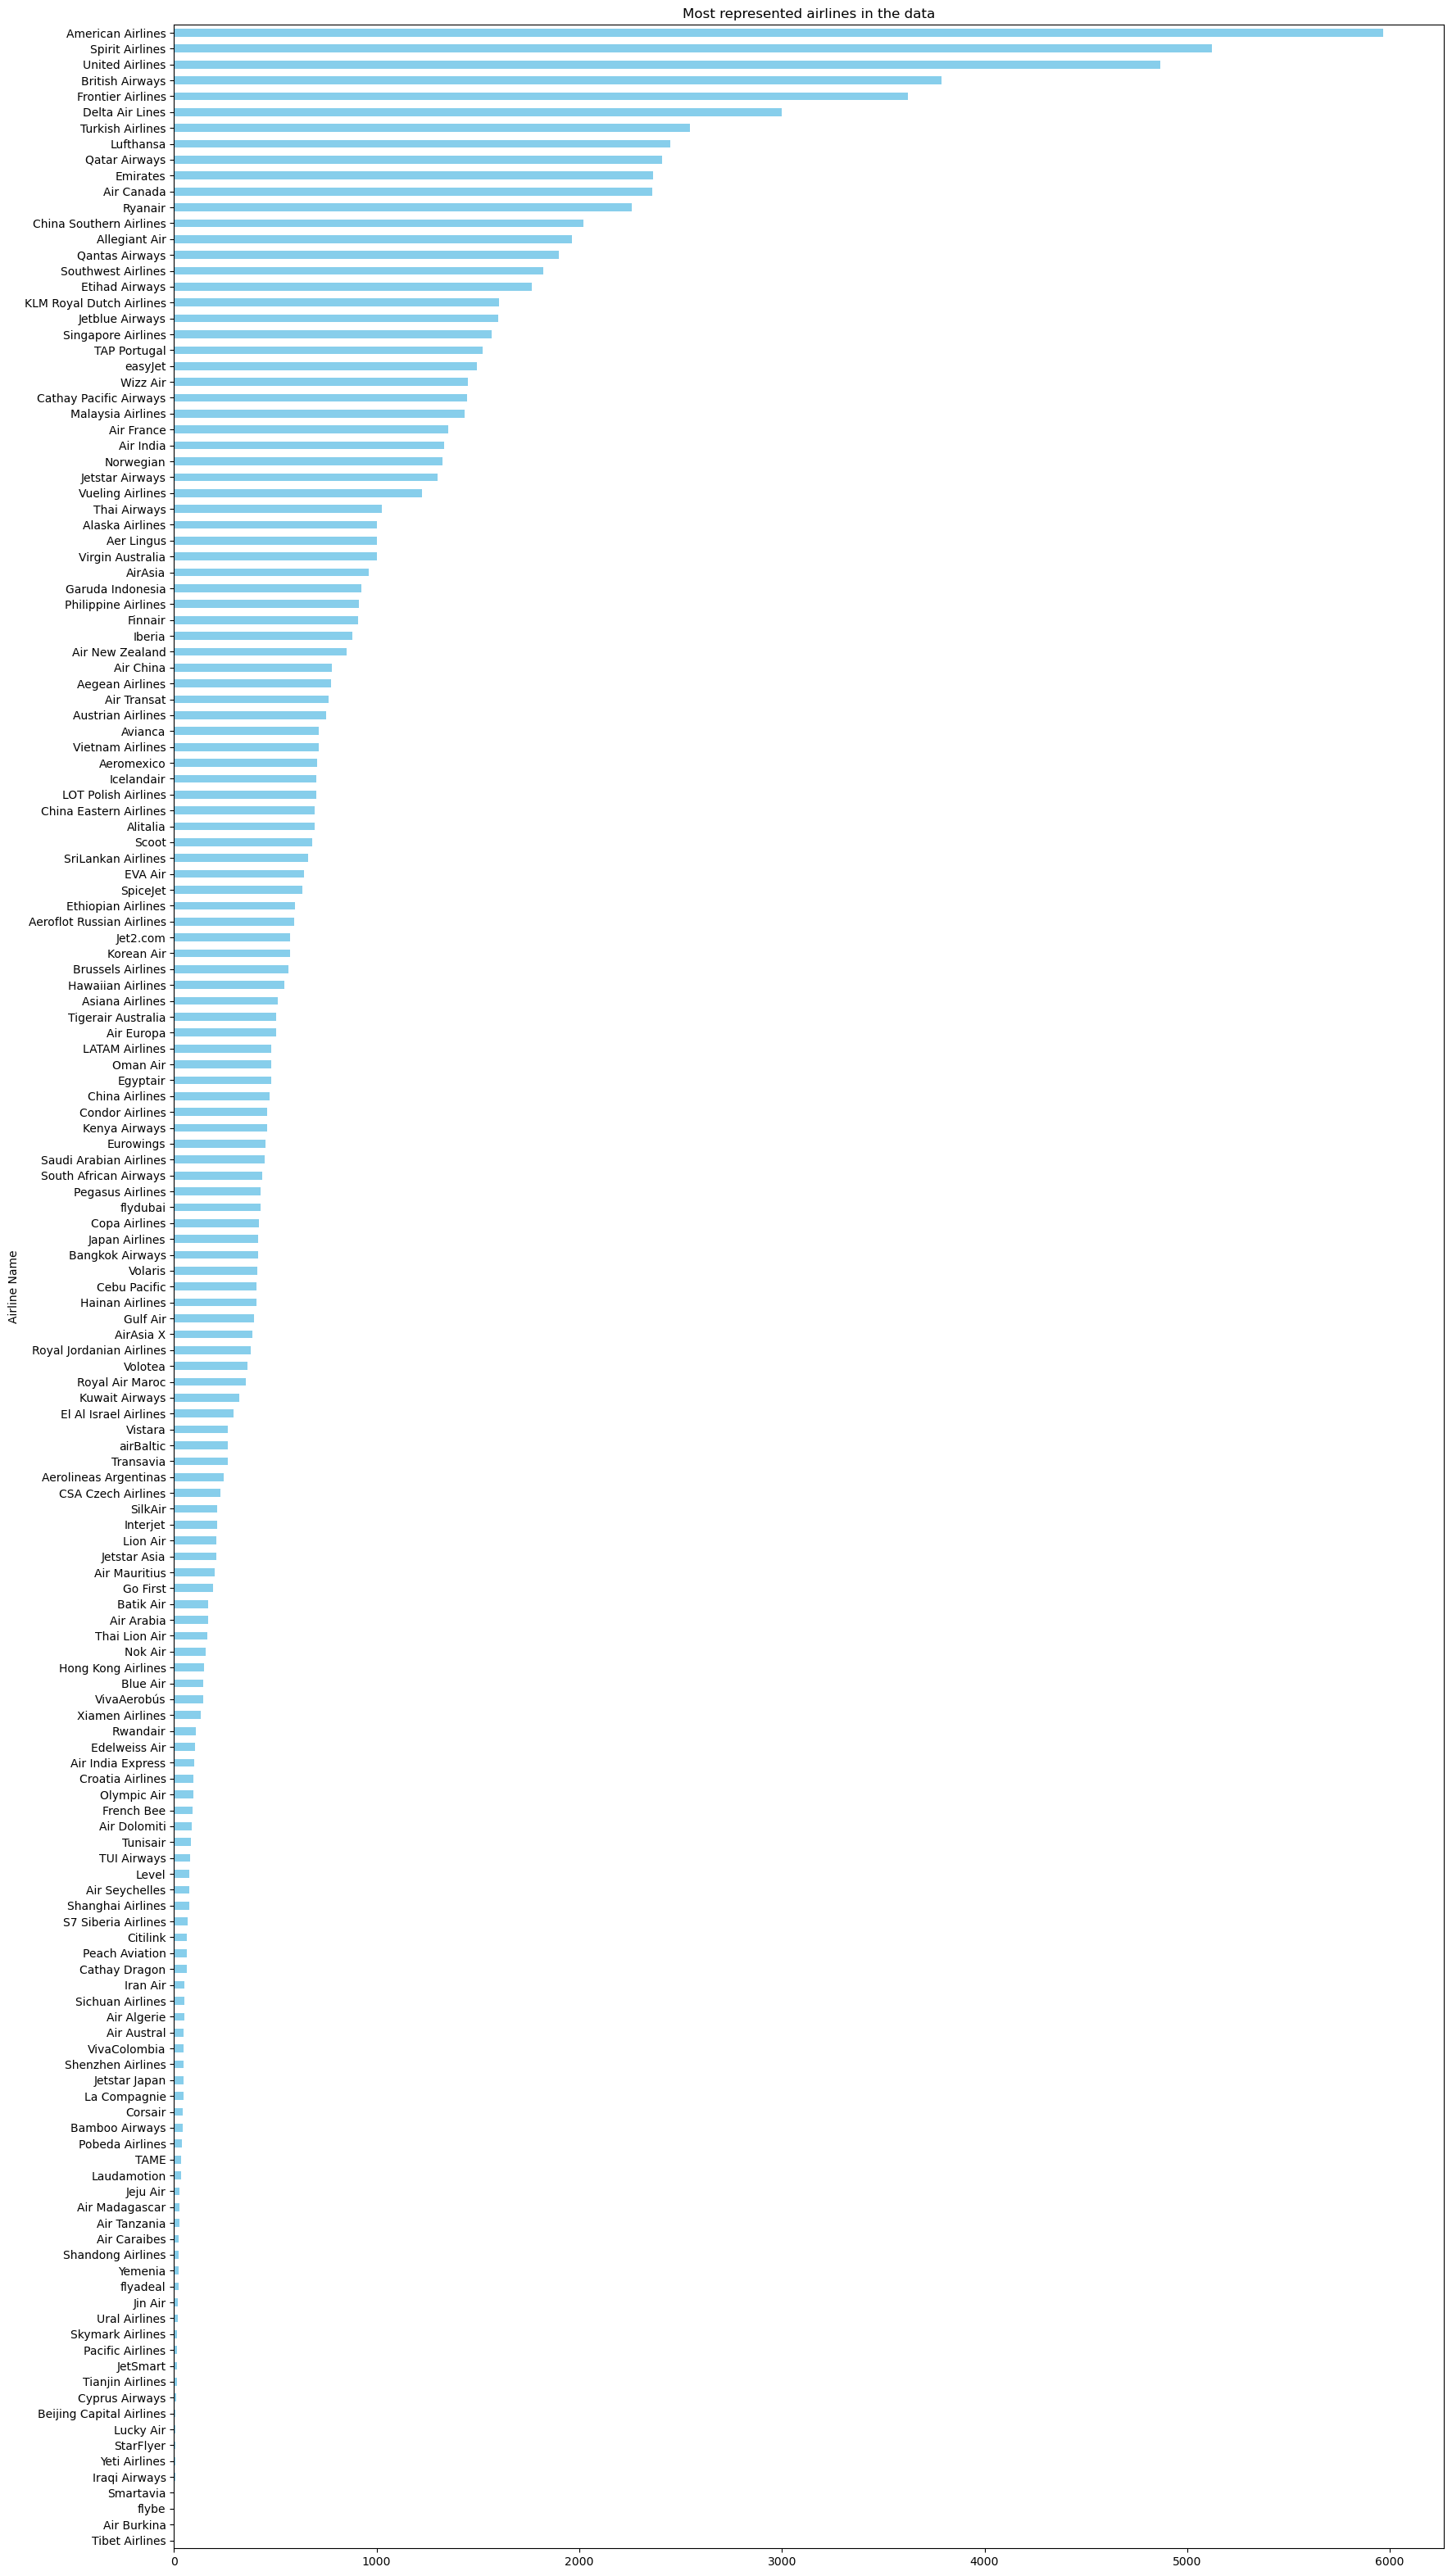

In [25]:
# Group by 'Airline Name', count the reviews, and plot directly
print(data.groupby('Airline Name')['Review'].count().sort_values(ascending=False).head(30))
data.groupby('Airline Name')['Review'].count().sort_values(ascending=True).plot(kind='barh', figsize=(20, 40), color='skyblue', title='Most represented airlines in the data')

plot of distribution of 'Overall_Rating' Variable

<Axes: xlabel='Overall_Rating'>

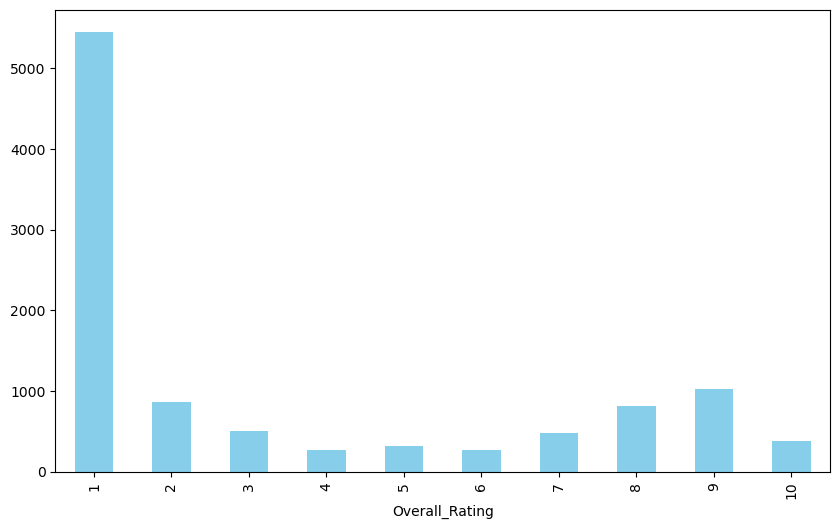

In [19]:
#Group by 'Airline Name', count the reviews, and plot directly
data.groupby('Overall_Rating')['Review'].count().plot(kind='bar', figsize=(10, 6), color='skyblue')

evolution nombre de critiques en fonction du temps (+par airline)
evolution ratings en fonction du temps (+par airline)

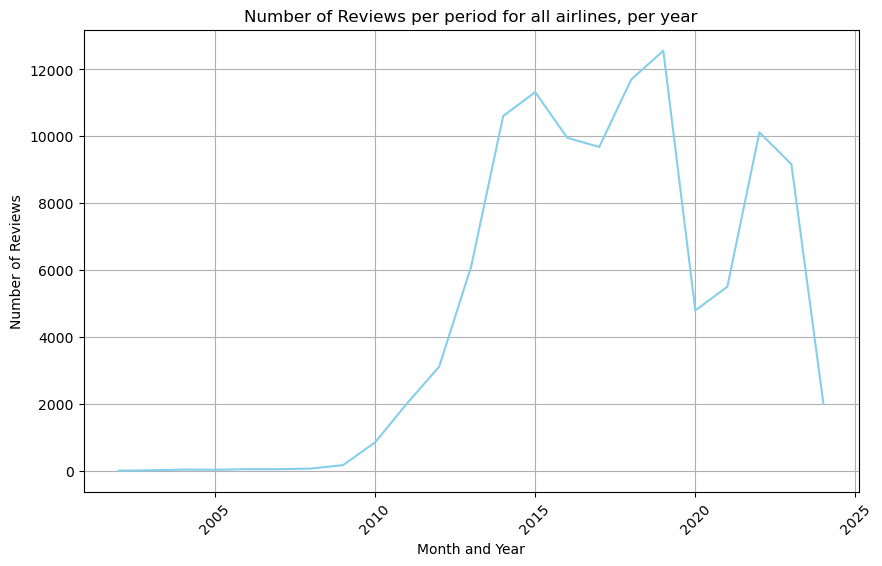

In [16]:
data['Review Date'] = pd.to_datetime(data['Review Date'])
# Group the reviews by month and year, and count the number of reviews in each group
#month, all
#monthly_reviews = data.groupby([data['Review Date'].dt.year, data['Review Date'].dt.month]).size()

#month, airline
#monthly_reviews = data[data['Airline Name']=='Air France'].groupby([data[data['Airline Name']=='Air France']['Review Date'].dt.year, data[data['Airline Name']=='Air France']['Review Date'].dt.month]).size()

#year, airline
#monthly_reviews = data[data['Airline Name']=='American Airlines'].groupby(data[data['Airline Name']=='American Airlines']['Review Date'].dt.year).size()

#year, all
monthly_reviews = data.groupby(data['Review Date'].dt.year).size()

# Plot the evolution of the number of reviews per month throughout the years
monthly_reviews.plot(figsize=(10, 6), color='skyblue')
plt.title('Number of Reviews per period for all airlines, per year')
plt.xlabel('Month and Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Repartition of classes

In [3]:
aspects = ['Seat Comfort', 'Cabin Staff Service',
                   'Food & Beverages', 'Ground Service',
                   'Inflight Entertainment', 'Wifi & Connectivity',
                   'Value For Money']
aspects_table = pd.DataFrame(columns=aspects)
for aspect in aspects:
    aspect_counts = data[aspect].value_counts()
    for rating in [1, 2, 3, 4, 5, np.nan]:
        if rating in aspect_counts.index:
            aspects_table.loc[rating, aspect] = aspect_counts[rating]
aspects_table.loc['Nan'] = len(data) - aspects_table.sum()
print('values distribution of ratings:')
aspects_table/len(data)*100

values distribution of ratings:


,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
1,27.65882,26.872908,24.219546,36.008223,21.28784,15.934726,40.27707
2,13.123999,11.036421,9.98672,6.518338,7.194186,2.405036,11.348421
3,17.991377,13.477842,13.19495,7.792716,10.892701,2.768884,11.386625
4,18.705429,15.338015,14.018156,9.923046,11.632222,2.404126,16.208521
5,13.968127,24.542461,12.83474,12.52456,10.247781,2.925338,20.153544
Nan,8.552249,8.732353,25.745889,27.233117,38.74527,73.561891,0.625819


In [13]:
# Example data initialization - replace 'data' with your actual DataFrame
# data = pd.DataFrame({
#     'Seat Comfort': np.random.choice([1, 2, 3, 4, 5, np.nan], size=100),
#     'Cabin Staff Service': np.random.choice([1, 2, 3, 4, 5, np.nan], size=100),
#     ...
# })

aspects = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service',
           'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money']

# Create a DataFrame to store the categorized counts
aspects_table = pd.DataFrame(index=['negative', 'positive'], columns=aspects)

# Process each aspect to categorize the ratings
for aspect in aspects:
    aspect_counts = data[aspect].value_counts(dropna=True)
    
    # Calculate counts for negative (1, 2, 3) and positive (4, 5) ratings
    negative_count = aspect_counts.loc[[1, 2, 3]].sum() if set([1, 2, 3]).issubset(aspect_counts.index) else 0
    positive_count = aspect_counts.loc[[4, 5]].sum() if set([4, 5]).issubset(aspect_counts.index) else 0
    #nan_count = aspect_counts.loc[np.nan] if np.nan in aspect_counts.index else 0
    
    # Assign the counts to the appropriate row in the DataFrame
    aspects_table.loc['negative', aspect] = negative_count
    aspects_table.loc['positive', aspect] = positive_count
    #aspects_table.loc['NaN', aspect] = nan_count

print('Values distribution of sentiments as percentages:')
aspects_table/aspects_table.sum()*100

Values distribution of sentiments as percentages:


,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
negative,64.270794,56.303819,63.836486,69.151343,64.280305,79.841734,63.408941
positive,35.729206,43.696181,36.163514,30.848657,35.719695,20.158266,36.591059
